In [1]:
import pandas as pd
df = pd.read_csv('kion10y.csv', encoding="utf-8")
df

,年,月,日,気温,品質,均質
0,2006,1,1,3.6,8,1
1,2006,1,2,4.0,8,1
2,2006,1,3,3.7,8,1
3,2006,1,4,4.0,8,1
4,2006,1,5,3.6,8,1
...,...,...,...,...,...,...
4013,2016,12,27,11.1,8,2
4014,2016,12,28,6.0,8,2
4015,2016,12,29,4.3,8,2
4016,2016,12,30,6.0,8,2


In [2]:
# file:hekin.py
import pandas as pd

# PandasでCSVを読み込む ---(*1)
df = pd.read_csv("kion10y.csv", encoding="utf-8")

# 日付ごとに気温をリストにまとめる ---(*2)
md = {}
for i, row in df.iterrows():
    m,  d, v = (int(row['月']), int(row['日']), float(row['気温']))
    key = "{:02d}/{:02d}".format(m,d)
    if not(key in md): md[key] = []
    md[key] += [v]

# 日付ごとに平均を求める ---(*3)
avs = {}
for key in sorted(md):
    v = avs[key] = sum(md[key]) / len(md[key]) # ---(*4)
    print("{0} : {1}".format(key, v))

01/01 : 6.0
01/02 : 6.545454545454546
01/03 : 6.145454545454546
01/04 : 6.1
01/05 : 6.4818181818181815
01/06 : 6.663636363636363
01/07 : 6.290909090909091
01/08 : 6.718181818181818
01/09 : 6.6000000000000005
01/10 : 6.0636363636363635
01/11 : 5.972727272727272
01/12 : 5.045454545454546
01/13 : 5.427272727272728
01/14 : 5.090909090909092
01/15 : 5.4363636363636365
01/16 : 5.654545454545454
01/17 : 5.627272727272726
01/18 : 5.045454545454546
01/19 : 6.0636363636363635
01/20 : 5.6909090909090905
01/21 : 5.6
01/22 : 5.5636363636363635
01/23 : 5.890909090909091
01/24 : 5.4818181818181815
01/25 : 6.0
01/26 : 6.027272727272727
01/27 : 6.363636363636363
01/28 : 6.5
01/29 : 6.281818181818181
01/30 : 6.763636363636365
01/31 : 6.754545454545453
02/01 : 6.309090909090909
02/02 : 6.663636363636363
02/03 : 6.363636363636363
02/04 : 5.800000000000001
02/05 : 5.790909090909091
02/06 : 5.318181818181818
02/07 : 6.1909090909090905
02/08 : 5.645454545454545
02/09 : 5.754545454545455
02/10 : 6.62727272727

In [3]:
avs["11/03"]

15.48181818181818

月
1      5.996481
2      6.598714
3     10.017009
4     14.481515
5     19.607918
6     22.544848
7     26.422287
8     27.887097
9     24.360303
10    19.155132
11    13.484545
12     8.653079
Name: 気温, dtype: float64


C:\Users\wmead\AppData\Local\Temp\ipykernel_17384\2489492933.py:11: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  plt.savefig("tenki-heikin-tuki.png")
c:\Users\wmead\.conda\envs\ml\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


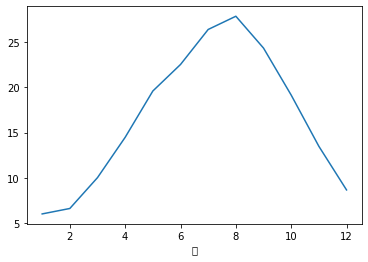

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
# CSVを読み込む ---(*1)
df = pd.read_csv("kion10y.csv", encoding="utf-8")
# 月ごとに平均を求める ---(*2)
g = df.groupby(['月'])["気温"]
gg = g.sum() / g.count()
# 結果を出力 ---(*3)
print(gg)
gg.plot()
plt.savefig("tenki-heikin-tuki.png")
plt.show()

c:\Users\wmead\.conda\envs\ml\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


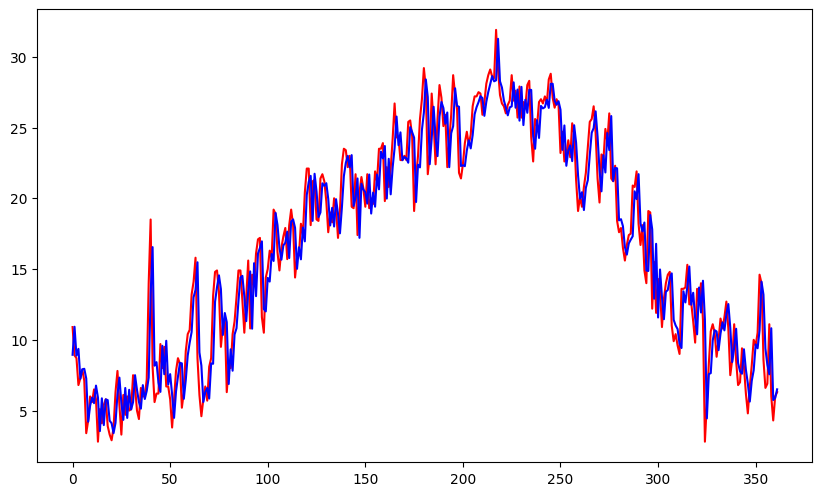

In [5]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('kion10y.csv', encoding="utf-8")

interval = 3
train_year = (df["年"] <= 2015)
test_year = (df["年"] >= 2016)

def make_data(data):
    x = []
    y = []
    temps = list(data["気温"])
    for i in range(len(temps)):
        if i <= interval: continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)

train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

# 機械学習を行う
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y) # 学習
pre_y = lr.predict(test_x) # 予測

# 結果を図にプロット
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.savefig('tenki-kion-lr.png')
plt.show()

c:\Users\wmead\.conda\envs\ml\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


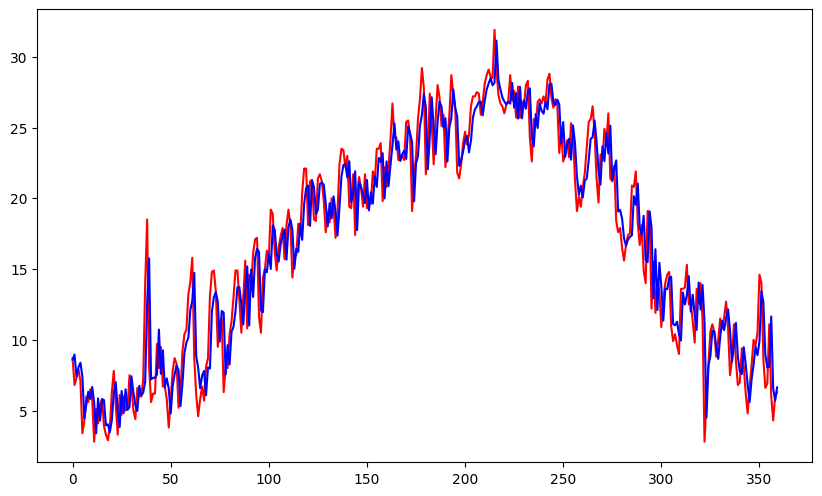

In [6]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 気温データ10年分の読み込み
df = pd.read_csv('kion10y.csv', encoding="utf-8")

# データを学習用とテスト用に分割する ---(*1)
train_year = (df["年"] <= 2015)
test_year = (df["年"] >= 2016)
interval = 6

# 過去6日分を学習するデータを作成 ---(*2)
def make_data(data):
    x = [] # 学習データ
    y = [] # 結果
    temps = list(data["気温"])
    for i in range(len(temps)):
        if i < interval: continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)

train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

# 直線回帰分析を行う ---(*3)
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y) # 学習
pre_y = lr.predict(test_x) # 予測

# 結果を図にプロット ---(*4)
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.savefig('tenki-kion-lr.png')
plt.show()



In [7]:
pre_y  - test_y

array([-0.10002007,  2.15225572,  0.10256015,  0.15142234,  1.28187488,
        4.01365434,  0.13671099, -0.56975101,  0.72603441, -0.68140458,
        0.87244611,  2.7607466 , -1.70903185,  1.75737089, -1.11231561,
        0.01187698,  1.83773828,  0.65039859,  1.12591734, -0.32619115,
       -1.97861532, -1.57885621,  1.59928286,  1.72686513, -2.27163088,
        1.68023609, -1.18539052,  1.50001243, -0.05121848, -2.25973761,
        0.72214703,  1.27944462,  0.98314343, -1.63017942,  0.74598537,
        0.06470342, -0.92896962, -6.94975005, -5.93966138,  7.65213866,
        1.595504  ,  1.11502761,  1.11392207, -2.14812766,  2.7258388 ,
       -1.9074255 ,  2.55773688, -0.06004565,  1.47215308,  2.75437918,
       -1.01277685, -1.07156242, -1.15714278, -0.1103171 ,  2.66758147,
       -0.98676704, -2.27801803, -1.34517563, -0.89701271, -3.05874001,
       -2.0044005 , -3.03635208,  6.03314611,  2.75256234,  3.40484054,
        0.78378786,  0.7571854 ,  2.09606982, -2.02017163, -0.65

In [8]:
diff_y = abs(pre_y  - test_y)
print("average=", sum(diff_y) / len(diff_y))
print("max=", max(diff_y))

average= 1.6640684971954247
max= 8.471949619908479


月
1      5.996481
2      6.598714
3     10.017009
4     14.481515
5     19.607918
6     22.544848
7     26.422287
8     27.887097
9     24.360303
10    19.155132
11    13.484545
12     8.653079
Name: 気温, dtype: float64


C:\Users\wmead\AppData\Local\Temp\ipykernel_17384\838427280.py:11: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  plt.savefig("tenki-heikin-tuki.png")
c:\Users\wmead\.conda\envs\ml\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


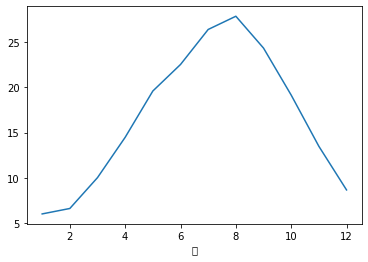

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
# CSVを読み込む ---(*1)
df = pd.read_csv("kion10y.csv", encoding="utf-8")
# 月ごとに平均を求める ---(*2)
g = df.groupby(['月'])["気温"]
gg = g.sum() / g.count()
# 結果を出力 ---(*3)
print(gg)
gg.plot()
plt.savefig("tenki-heikin-tuki.png")


In [10]:
import pandas as pd

# PandasでCSVを読み込む
df = pd.read_csv("kion10y.csv", encoding="utf-8")

# 日付ごとに気温をリストにまとめる
md = {}
for i, row in df.iterrows():
    m,  d, v = (int(row['月']), int(row['日']), float(row['気温']))
    key = str(m) + "/" + str(d)
    if not(key in md): md[key] = []
    md[key] += [v]

# 日付ごとに平均を求める
avs = {}
for key in md:
    v = avs[key] = sum(md[key]) / len(md[key])
    print("{0} : {1}".format(key, v))



1/1 : 6.0
1/2 : 6.545454545454546
1/3 : 6.145454545454546
1/4 : 6.1
1/5 : 6.4818181818181815
1/6 : 6.663636363636363
1/7 : 6.290909090909091
1/8 : 6.718181818181818
1/9 : 6.6000000000000005
1/10 : 6.0636363636363635
1/11 : 5.972727272727272
1/12 : 5.045454545454546
1/13 : 5.427272727272728
1/14 : 5.090909090909092
1/15 : 5.4363636363636365
1/16 : 5.654545454545454
1/17 : 5.627272727272726
1/18 : 5.045454545454546
1/19 : 6.0636363636363635
1/20 : 5.6909090909090905
1/21 : 5.6
1/22 : 5.5636363636363635
1/23 : 5.890909090909091
1/24 : 5.4818181818181815
1/25 : 6.0
1/26 : 6.027272727272727
1/27 : 6.363636363636363
1/28 : 6.5
1/29 : 6.281818181818181
1/30 : 6.763636363636365
1/31 : 6.754545454545453
2/1 : 6.309090909090909
2/2 : 6.663636363636363
2/3 : 6.363636363636363
2/4 : 5.800000000000001
2/5 : 5.790909090909091
2/6 : 5.318181818181818
2/7 : 6.1909090909090905
2/8 : 5.645454545454545
2/9 : 5.754545454545455
2/10 : 6.627272727272726
2/11 : 5.618181818181818
2/12 : 5.690909090909091
2/13

In [11]:
g = df.groupby(['月'])["気温"]
g.sum() / g.count()

月
1      5.996481
2      6.598714
3     10.017009
4     14.481515
5     19.607918
6     22.544848
7     26.422287
8     27.887097
9     24.360303
10    19.155132
11    13.484545
12     8.653079
Name: 気温, dtype: float64

月
1      5.996481
2      6.598714
3     10.017009
4     14.481515
5     19.607918
6     22.544848
7     26.422287
8     27.887097
9     24.360303
10    19.155132
11    13.484545
12     8.653079
Name: 気温, dtype: float64


C:\Users\wmead\AppData\Local\Temp\ipykernel_17384\2729224266.py:11: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  plt.savefig("")
c:\Users\wmead\.conda\envs\ml\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


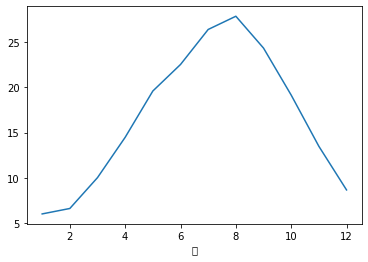

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
# CSVを読み込む --- (*1)
df = pd.read_csv("kion10y.csv", encoding="utf-8")
# 月ごとに平均を求める --- (*2)
g = df.groupby(['月'])["気温"]
gg = g.sum() / g.count()
# 結果を出力 --- (*3)
print(gg)
gg.plot()
plt.savefig("")

年
2006     2
2007    11
2008     5
2010    21
2011     9
2012     8
2013    16
2014    12
2015     7
2016     1
Name: 年, dtype: int64


<AxesSubplot:xlabel='年'>

c:\Users\wmead\.conda\envs\ml\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


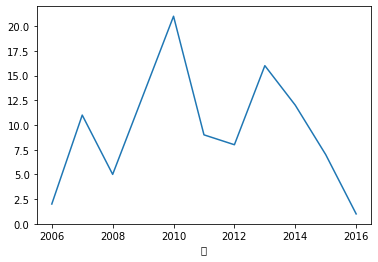

In [13]:
import pandas as pd
df = pd.read_csv('kion10y.csv', encoding="utf-8")
atui = (df["気温"] > 30)
cnt = df[atui].groupby(["年"])["年"].count()
print(cnt)
cnt.plot()